## Redes Neurais Artificiais 2024.1

- **Disciplina**: Redes Neurais Artificiais 2024.1  
- **Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
- **Github**: http://github.com/elloa  
        

Levando em conta a base de dados **_Forest Cover Type_**, esta segunda parte do Projeto Prático 2.2 diz respeito à proposição e avaliação de múltiplas redes neurais artificiais do tipo feedforward multilayer perceptron para o problema da classificação multi-classe da cobertura florestal em uma área do Roosevelt National Forest.

> **Time**
* Diana Martins - 2115310033
* Gabriel Dos Santos Lima- 2115310010
* Thiago Marques - 2115310024
* Debora Souza Barros - 2115310058


## Testando Redes Neurais sem os Atributos Categórios

1. Abra a base de dados em questão
2. Elimine todas as colunas relativas aos atributos categóricos
3. Armazene o atributo alvo em uma variável y e os atributos preditores em uma variável X
4. Efetue uma partição holdout 70/30 com o sklearn, distribuindo os exemplos de maneira aleatória
5. Efetue o escalonamento dos atributos

### Escalonando os atributos

O treinamento de uma rede neural artificial é mais eficiente quando os valores que lhes são fornecidos como entrada são pequenos, pois isto favorece a convergência. Isto é feito escalonando-se todos os atributos para o intervalo [0,1], mas precisa ser feito de maneira cautelosa, para que informações do conjunto de teste não sejam fornecidas no treinamento.

Há duas estratégias para tal escalonamento: normalização e padronização. Ambas possuem características particulares, vantagens e limitações, como é possível ver aqui: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/


No nosso caso, vamos usar a padronização. Assim, com os atributos preditores do treinamento, isto é, X_train, deve-se subtrair a média e dividir pelo desvio padrão:

X_train_std = (X_train - np.mean(X_train))/np.std(X_train)

Em seguida, o mesmo deve ser feito com os atributos preditores do conjunto de testes, mas com padronização relativa ao conjunto de treinamento:

X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

Se todo o conjunto X for utilizado na padronização, a rede neural receberá informações do conjunto de teste por meio da média e variância utilizada para preparar os dados de treinamento, o que não é desejável.


### Continuando

5. Treine uma rede neural multilayer perceptron para este problema com uma única camada e dez neurônios  
    5.1 Utilize a função de ativação ReLU  
    5.2 Utilize o solver Adam    
    5.3 Imprima o passo a passo do treinamento    
    5.4 Utilize o número máximo de épocas igual a 300  
6. Com o modelo em questão, após o treinamento, apresente:  
    6.1 Matriz de confusão para o conjunto de teste  
    6.2 Acurácia  
    6.3 F-Score  
    6.4 Precisão  
    6.5 Revocação  
7. Repita o treinamento da mesma rede anterior sem imprimir o passo a passo (verbose False) por 10 vezes  
    7.1 Cada uma destas repetições deve ser feita com uma nova partição Holdout  
    7.2 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
8. Repita por 10 vezes o treinamento desta mesma rede, mas utilizando o otimizador SGD  
    8.1 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
9. Houve influência da escolha do otimizador no desempenho da rede?


In [ ]:
! pip show seaborn

Name: seaborn
Version: 0.12.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: /opt/conda/lib/python3.10/site-packages
Requires: matplotlib, numpy, pandas
Required-by: geoplot, hypertools, missingno, segregation, splot, spvcm, ydata-profiling


In [ ]:
# Bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import warnings

from prettytable import PrettyTable
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [ ]:
# Baixando o dataset para o diretório local
if not os.path.isfile('covtype.csv'):
  !kaggle datasets download -d uciml/forest-cover-type-dataset
  !unzip forest-cover-type-dataset.zip
  !rm *.zip

Dataset URL: https://www.kaggle.com/datasets/uciml/forest-cover-type-dataset
License(s): unknown
 89%|█████████████████████████████████▉    | 10.0M/11.2M [00:00<00:00, 17.0MB/s]
100%|██████████████████████████████████████| 11.2M/11.2M [00:00<00:00, 13.1MB/s]
Archive:  forest-cover-type-dataset.zip
  inflating: covtype.csv             


In [ ]:
# Abertura da base de dados
df = pd.read_csv('covtype.csv')
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
# Eliminando todas as colunas relativas aos atributos categóricos (wilderness areas e soil types)

filter_df = [col for col in df.columns if 'wilderness_area' not in col.lower() and 'soil_type' not in col.lower()]
df = df[filter_df]

display(df.columns)
print(f'\nQuantidade de colunas restantes após a exclusão de atributos categóricos: {df.shape[1]}')

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Cover_Type'],
      dtype='object')


Quantidade de colunas restantes após a exclusão de atributos categóricos: 11


In [ ]:
class Logger():
  def __init__(self, silence = False):
    self.__content: list[str] = []
    self.silence = silence

  def reset(self):
    self.content = []

  def add(self, output: str):
    if self.silence: return
    self.__content.append(output)

  def show(self):
    if self.silence: return
    for info in self.__content:
      print(info)

In [ ]:
from itertools import product

class AutoMLP:
  def __init__(self, params: dict[str, list] | list, X, y, holdout_size=.3, scale=True, n_random_archs=10, verbose=False, logger=Logger()):
    self.params = params
    self.estimators = []
    self.logger = logger
    self.n_random_archs = n_random_archs

    self.X = X
    self.y = y
    self.holdout_size = holdout_size
    self.scale = scale

    self.verbose = verbose

  def __scale(self, X_train, X_test):
    X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
    X_test_std = (X_test - np.mean(X_train))/np.std(X_train)
    return X_train_std, X_test_std

  def __train_test_split(self):
    X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=self.holdout_size)
    if self.scale:
      X_train, X_test = self.__scale(X_train, X_test)
    return X_train, X_test, y_train, y_test

  def __generate_hidden_layer_sizes_possibilities(self, n_neurons, n_hidden_layers):
    tuples = product(range(1, n_neurons + 1), repeat=n_hidden_layers)
    distributions = [comb for comb in tuples if sum(comb) == n_neurons]
    return distributions

  def __select_n_random_architectures(self, n = 10):
    all_possibilities = []
    for n_neurons in self.params['n_neurons']:
      for n_hidden_layer in self.params['n_hidden_layer']:
        for max_epochs in self.params['max_epochs']:
          for solver in self.params['solver']:
            for layers_possibilities in self.__generate_hidden_layer_sizes_possibilities(n_neurons, n_hidden_layer):
              all_possibilities.append(dict(hidden_layer_sizes=layers_possibilities, max_iter=max_epochs, solver=solver))
    sorted_possibilities = np.random.choice(range(len(all_possibilities)), n)
    return [all_possibilities[index] for index in sorted_possibilities]

  def fit(self, rate = 1, shuffle = False, log_verbose = True):
    # Reiniciando a classe de logs
    self.logger.reset()

    # Gerando conjunto de treino e teste
    x_train, x_test, y_train, y_test = self.__train_test_split()

    if(type(self.params) == list):
      random_archs = self.params
    else:
      # Aleatoriamente escolhe 10 diferentes arquiteturas (com diferentes parâmetros) para realizar o treinamento
      random_archs = self.__select_n_random_architectures(self.n_random_archs)

    for arch in random_archs:
      self.logger.add(f"Treinando nova rede [hidden_layer_sizes = {arch['hidden_layer_sizes']}, max_epochs = {arch['max_iter']}, solver = {arch['solver']}]")
      for index in range(rate):
        mlp_neural_network = MLPClassifier(activation='relu',
                                          verbose=self.verbose,
                                           **arch)
        # Treinando
        warnings.simplefilter('ignore', category=ConvergenceWarning)
        mlp_neural_network.fit(x_train, y_train)

        # Calculando as métricas
        y_pred = mlp_neural_network.predict(x_test)
        f = f1_score(y_test, y_pred, average="weighted", zero_division=0.0)
        accuracy = accuracy_score(y_test, y_pred)

        self.logger.add(f"Iteração {index+1} [accuracy = {accuracy}, f1_score = {f}]")

        # Salvando métricas para futuro ranking
        self.estimators.append((mlp_neural_network, accuracy, f, [x_train, x_test, y_train, y_test, y_pred]))

        # Gerando novo holdout a cada iteração
        if shuffle:
          x_train, x_test, y_train, y_test = self.__train_test_split()

    if log_verbose:
      self.logger.show()

  def get_n_best_estimators(self,top = 3):
      self.estimators.sort(reverse=True,key = lambda estimator: (estimator[1], estimator[2]))
      best_estimators = self.estimators[:top].copy()
      return best_estimators


In [ ]:
# Armazenar o atributo alvo em uma variável y e os atributos preditores em uma variável X
sample_size = round(len(df) * 0.1)
sample = df.sample(sample_size)
y = sample.Cover_Type
X = sample.drop('Cover_Type', axis=1)

In [ ]:
params = {
  'hidden_layer_sizes': (10,),
  'solver': 'adam',
  'max_iter': 300
}

In [ ]:
# A classe AutoMLP fará o holdout 70/30 com o sklearn, e o escalonamento dos atributos
auto_mlp = AutoMLP(params=[params], X=X, y=y, holdout_size=0.30, scale=True, verbose=True)

# Treinando a rede com os parâmetros
auto_mlp.fit(log_verbose=False)

/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Iteration 1, loss = 22.93822728
Iteration 2, loss = 1.37099995
Iteration 3, loss = 1.22090273
Iteration 4, loss = 1.19009720
Iteration 5, loss = 1.16326907
Iteration 6, loss = 1.13526655
Iteration 7, loss = 1.10797844
Iteration 8, loss = 1.08058259
Iteration 9, loss = 1.05400076
Iteration 10, loss = 1.02611146
Iteration 11, loss = 1.00072281
Iteration 12, loss = 0.97735706
Iteration 13, loss = 0.95785758
Iteration 14, loss = 0.93760741
Iteration 15, loss = 0.92079412
Iteration 16, loss = 0.90397658
Iteration 17, loss = 0.88838018
Iteration 18, loss = 0.87583605
Iteration 19, loss = 0.86281092
Iteration 20, loss = 0.85131351
Iteration 21, loss = 0.84121335
Iteration 22, loss = 0.83097217
Iteration 23, loss = 0.82571400
Iteration 24, loss = 0.81602623
Iteration 25, loss = 0.80772892
Iteration 26, loss = 0.80145321
Iteration 27, loss = 0.79559212
Iteration 28, loss = 0.78979800
Iteration 29, loss = 0.78448813
Iteration 30, loss = 0.78117857
Iteration 31, loss = 0.77546710
Iteration 32, lo

In [ ]:
# Matriz de confusão para o conjunto de teste

def show_metrics(y_test, prediction):

    # Matriz de Confusão
    cm = confusion_matrix(y_test, prediction)
    plt.figure(figsize=(10,8))
    plt.title('Matriz de confusão')
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues')
    plt.show()

    # Acurácia
    acc = accuracy_score(y_test, prediction)
    print(f"\nAcurácia: {acc}")

    # F1-Score
    f_score = f1_score(y_test, prediction, average='weighted')
    print(f"\nF-Score: {f_score}")

    # Precisão
    precision = precision_score(y_test, prediction, average='weighted')
    print(f"\nPrecisão: {precision}")

    # 6.5 Revocação
    recall = recall_score(y_test, prediction, average='weighted')
    print(f"\nRevocação: {recall}")

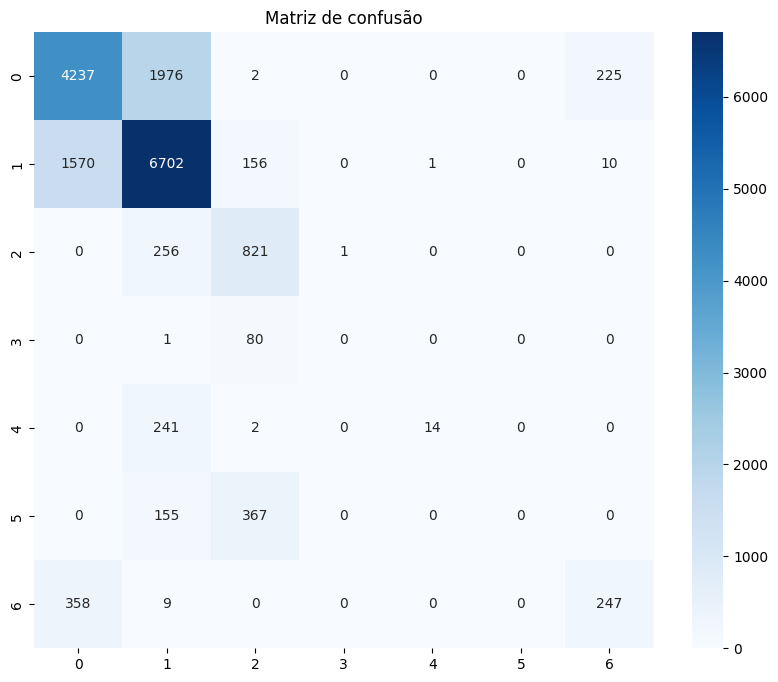


Acurácia: 0.6896334117377086

F-Score: 0.6712944977782117

Precisão: 0.6686800614532936

Revocação: 0.6896334117377086


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
_, _, _, y_test, y_pred  = auto_mlp.get_n_best_estimators(1)[0][3]
show_metrics(y_test, y_pred)

In [ ]:
def print_architectures(architectures):
    table = PrettyTable()
    table.field_names = ["hidden layer sizes", "max epochs", "solver", "Accuracy", "F1 Score"]
    table.title = f"Architectures Metrics"

    for arch in architectures:
      accuracy_list = []
      f1_list = []
      params = arch['params']
      for estimator in arch['output']:
        accuracy_list.append(estimator[1])
        f1_list.append(estimator[2])

      acc_mean = np.mean(accuracy_list)
      acc_std = np.std(accuracy_list)

      f1_mean = np.mean(f1_list)
      f1_std = np.std(f1_list)

      table.add_row([f"{params['hidden_layer_sizes']}", f"{params['max_iter']}", f"{params['solver']}", f"{'%.2f'%acc_mean} ± {'%.2f'%acc_std}", f"{'%.2f'%f1_mean} ± {'%.2f'%f1_std}"])
      # table.add_row(["", "", "", "", ""])

    print(table)

In [ ]:
# Repetindo o treinamento da mesma rede anterior sem imprimir o passo a passo (verbose False) por 10 vezes

# A classe AutoMLP fará o holdout 70/30 com o sklearn, e o escalonamento dos atributos
auto_mlp = AutoMLP(params=[params], X=X, y=y, holdout_size=0.30, scale=True, verbose=False)
# Treinando a rede 10 vezes com shuffle=True para criar uma nova partição Holdout a cada execução
auto_mlp.fit(rate=10, shuffle=True, log_verbose=False)

# Média e desvio padrão da acurácia e do F-Score
print_architectures([dict(params=params, output=auto_mlp.estimators)])

/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=ax

+----------------------------------------------------------------------+
|                        Architectures Metrics                         |
+--------------------+------------+--------+-------------+-------------+
| hidden layer sizes | max epochs | solver |   Accuracy  |   F1 Score  |
+--------------------+------------+--------+-------------+-------------+
|       (10,)        |    300     |  adam  | 0.69 ± 0.00 | 0.66 ± 0.00 |
+--------------------+------------+--------+-------------+-------------+


/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [ ]:
# Repetir por 10 vezes o treinamento desta mesma rede, mas utilizando o otimizador SGD
params = {
  'hidden_layer_sizes': (10,),
  'solver': 'sgd',
  'max_iter': 300
}

# A classe AutoMLP fará o holdout 70/30 com o sklearn, e o escalonamento dos atributos
auto_mlp = AutoMLP(params=[params], X=X, y=y, holdout_size=0.30, scale=True, verbose=False)
# Treinando a rede 10 vezes com shuffle=True para criar uma nova partição Holdout a cada execução
auto_mlp.fit(rate=10, shuffle=True, log_verbose=False)

# Média e desvio padrão da acurácia e do F-Score
print_architectures([dict(params=params, output=auto_mlp.estimators)])

/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=ax

+----------------------------------------------------------------------+
|                        Architectures Metrics                         |
+--------------------+------------+--------+-------------+-------------+
| hidden layer sizes | max epochs | solver |   Accuracy  |   F1 Score  |
+--------------------+------------+--------+-------------+-------------+
|       (10,)        |    300     |  sgd   | 0.60 ± 0.10 | 0.52 ± 0.16 |
+--------------------+------------+--------+-------------+-------------+


/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


### Houve influência da escolha do otimizador no desempenho da rede?

Com o otimizador SGD, a rede teve um melhor desempenho, isso se deve ao fato de que o SGD é um bom otimizador para problemas de classificação binária ou multiclasse, especialmente quando se lida com grandes conjuntos de dados. Sua principal vantagem reside na velocidade de convergência, superando o Adam em muitos casos. Já o otimizador Adam, particularmente adequado para pequenos conjuntos de dados, utiliza estimativas adaptativas do primeiro e segundo momentos para atualizar os pesos da rede, resultando em uma convergência mais rápida para o mínimo global.

## Discussão

Nos passos anteriores, você avaliou o desempenho de uma única rede neural que contém os seguintes parâmetros: uma única camada oculta com 10 neurônios e função de ativação ReLU. O otimizador utilizado, quer seja SGD ou ADAM, trata-se do algoritmo para aproximar o gradiente do erro. Neste sentido, a escolha do otimizador é um hiperparâmetro, pois diz respeito a como a rede neural definida previamente atuará "em tempo de execução"  durante o processo de treinamento. Também são hiperparâmetros a quantidade de épocas, a taxa de aprendizado inicial, dentre outros.

Cabe alientar também que você efetuou o treinamento desta rede por 10 vezes e apresentou os resultados em termos de média +- desvio padrão. Lembre-se que em uma rede neural há a inicialização aleatória de pesos e, em consequência, o desempenho delas está sujeito à uma flutuação estocástica. A execução destas múltiplas vezes faz com que eliminemos algum viés introduzido por uma boa ou má "sorte" na escolha de pesos no caso de uma única execução.

Você também aprendeu uma estratégia para escalonar os atributos para uma melhor convergência da rede. Utilize-a em todos os treinamentos e testes propostos a seguir.

## Propondo Novas Arquiteturas

Variando  os parâmetros (uma ou duas camadas ocultas, com diferente números de neurônios em cada uma delas e a função de ativação) e o hiperparâmetros solver (Adam ou SGD) e o número de épocas (100,150 e 200), atenda ao que se pede:

1. Proponha 10 arquiteturas distintas de RNAs para o problema em questão, à sua escolha
2. Avalie cada uma das arquiteturas perante todos os hiperparâmetros apresentados por 100 vezes
3. Como resultado da avaliação, apresente:  
    3.1 Top-3 melhores redes no tocante à F-Score e Acurácia  
    3.2 Repetição em que houve o melhor desempenho de cada uma dessas redes: ilustre tp, tf, fp e fn  

#### Preparando as funções utilitárias e hiperparâmetros

In [ ]:
def print_best_estimators(top_estimators):
    table = PrettyTable()
    table.field_names = ["hidden layer sizes", "max epochs", "solver", "Accuracy", "F1 Score"]
    table.title = f"top {len(top_estimators)} estimator(s)"
    for estimator in top_estimators:
        params = estimator[0].get_params()
        table.add_row(
            [
                params["hidden_layer_sizes"],
                params["max_iter"],
                params["solver"],
                f"{'%.2f'%estimator[1]}",
                f"{'%.2f'%estimator[2]}",
            ]
        )
    print(table, end="\n\n")

In [ ]:
# Definindo parâmetros...
params = {
    'n_neurons': [10, 20, 30],
    'n_hidden_layer': [1, 2],
    'max_epochs': [100, 150, 200],
    'solver': ['adam', 'sgd']
}

In [ ]:
# a classe AutoMLP irá gerar as 10 arquiteturas aleatórias com base nas possibilidades da variável params
auto_mlp = AutoMLP(params=params, X=X, y=y, holdout_size=0.30, n_random_archs=10, scale=True)

# Treinando cada arquitetura por 10 vezes
auto_mlp.fit(rate=10)

Treinando nova rede [hidden_layer_sizes = (10,), max_epochs = 300, solver = adam]
Iteração 1 [accuracy = 0.6896334117377086, f1_score = 0.6712944977782117]
Treinando nova rede [hidden_layer_sizes = (10,), max_epochs = 300, solver = adam]
Iteração 1 [accuracy = 0.6826917560667776, f1_score = 0.6608070471381703]
Iteração 2 [accuracy = 0.6842980896104641, f1_score = 0.6666921562032518]
Iteração 3 [accuracy = 0.6845275658309907, f1_score = 0.6592389225171744]
Iteração 4 [accuracy = 0.6867649589811256, f1_score = 0.6690086746940715]
Iteração 5 [accuracy = 0.6884860306350754, f1_score = 0.6649035907418118]
Iteração 6 [accuracy = 0.6877402329183638, f1_score = 0.6722425706017771]
Iteração 7 [accuracy = 0.6868796970913889, f1_score = 0.6656482735219639]
Iteração 8 [accuracy = 0.6854454707130974, f1_score = 0.670124525421126]
Iteração 9 [accuracy = 0.681429636853881, f1_score = 0.6557489144159556]
Iteração 10 [accuracy = 0.6831507085078309, f1_score = 0.6632956119460752]
Treinando nova rede [hi

In [ ]:
top_3_estimators = auto_mlp.get_n_best_estimators()
print_best_estimators(top_3_estimators)

+----------------------------------------------------------------+
|                       top 3 estimator(s)                       |
+--------------------+------------+--------+----------+----------+
| hidden layer sizes | max epochs | solver | Accuracy | F1 Score |
+--------------------+------------+--------+----------+----------+
|      (5, 25)       |    150     |  adam  |   0.71   |   0.70   |
|      (17, 13)      |    150     |  adam  |   0.70   |   0.68   |
|      (16, 14)      |    100     |  adam  |   0.70   |   0.68   |
+--------------------+------------+--------+----------+----------+



In [ ]:
def print_classes(array):
  return ", ".join(str(i) for i in array)

def calculate_performance_measurement(estimators, x_test, y_test, title="Métricas dos Top 3 Modelos (para todas as classes)"):
  table = PrettyTable()
  table.title = title
  table.field_names = ['Rede', 'True Positive', 'True Negative', 'False Positive', 'False Negative']
  for estimator in estimators:
    nn = estimator[0]
    y_pred = nn.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    TP = np.diag(cm)
    FP = cm.sum(axis=0) - np.diag(cm)
    FN = cm.sum(axis=1) - np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)
    table.add_row([f'{nn}', print_classes(TP), print_classes(TN), print_classes(FP), print_classes(FN)])
  print(table)

In [ ]:
top_3_estimators = auto_mlp.get_n_best_estimators()
_, X_test_std, _, y_test, _  = top_3_estimators[0][3]

calculate_performance_measurement(top_3_estimators, X_test_std, y_test)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|                                                                                Métricas dos Top 3 Modelos (para todas as classes)                                                                                |
+----------------------------------------------------------+--------------------------------+-----------------------------------------------+---------------------------------+------------------------------------+
|                           Rede                           |         True Positive          |                 True Negative                 |          False Positive         |           False Negative           |
+----------------------------------------------------------+--------------------------------+-----------------------------------------------+-------

## Estimando o número de neurônios

Um dos problemas de pesquisa com redes neurais artificiais consiste na determinação do número de neurônios em sua arquitetura. Embora não seja possível definir a priori qual rede neural é adequada para um problema, pois isto só é possível mediante uma busca exaustiva, há regras na literatura que sugerem o número de neurônios escondidos, tal como a regra da Pirâmide Geométrica, dada a seguir:

$$N_h = \alpha \cdot \sqrt{N_i \cdot N_o},$$

em que $N_h$ é o número de neurônios ocultos (a serem distribuídos em uma ou duas camadas ocultas), $N_i$ é o número de neurônios na camada de entrada e $N_o$ é o número de neurônios na camada de saída.

1. Consulte a documentação da classe MLPClassifier (disponível em https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) e obtenha os valores de $N_i$ e $N_o$.
2. Teste os valores de $\alpha$ como sendo iguais a $0.5$, $2$ e $3$.
3. Proponha pelo menos 30 redes neurais segundo a regra da pirâmide geométrica e teste-as nos mesmos termos estabelecidos anterioremente  (solver, épocas, etc.)  
    3.1 Apresente as top-3 melhores redes no tocante à F-Score e Acurácia  

In [ ]:
# Número de neurônios na camada de entrada e de saída
Ni = len(X.columns)
No = len(y.unique())

print(f"{Ni} neurônio[s] de entrada")
print(f"{No} neurônio[s] de saída")

10 neurônio[s] de entrada
7 neurônio[s] de saída


In [ ]:
# Número de neurônios ocultos
Nh = []
for α in [0.5, 2 , 3]:
  Nh.append(int(np.round(α * np.sqrt(Ni * No))))

Nh

[4, 17, 25]

In [ ]:
# Definindo parâmetros...
params = {
    'n_neurons': Nh,
    'n_hidden_layer': [1, 2],
    'max_epochs': [100, 150, 200],
    'solver': ['adam', 'sgd']
}

In [ ]:
# Instanciândo MLP
auto_mlp = AutoMLP(params=params, X=X, y=y, holdout_size=0.30, n_random_archs=30, scale=True)

# Treinando cada arquitetura por 10 vezes
auto_mlp.fit(rate=10)

/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Treinando nova rede [hidden_layer_sizes = (10,), max_epochs = 300, solver = adam]
Iteração 1 [accuracy = 0.6896334117377086, f1_score = 0.6712944977782117]
Treinando nova rede [hidden_layer_sizes = (10,), max_epochs = 300, solver = adam]
Iteração 1 [accuracy = 0.6826917560667776, f1_score = 0.6608070471381703]
Iteração 2 [accuracy = 0.6842980896104641, f1_score = 0.6666921562032518]
Iteração 3 [accuracy = 0.6845275658309907, f1_score = 0.6592389225171744]
Iteração 4 [accuracy = 0.6867649589811256, f1_score = 0.6690086746940715]
Iteração 5 [accuracy = 0.6884860306350754, f1_score = 0.6649035907418118]
Iteração 6 [accuracy = 0.6877402329183638, f1_score = 0.6722425706017771]
Iteração 7 [accuracy = 0.6868796970913889, f1_score = 0.6656482735219639]
Iteração 8 [accuracy = 0.6854454707130974, f1_score = 0.670124525421126]
Iteração 9 [accuracy = 0.681429636853881, f1_score = 0.6557489144159556]
Iteração 10 [accuracy = 0.6831507085078309, f1_score = 0.6632956119460752]
Treinando nova rede [hi

In [ ]:
# Imprimindo os melhores estimators
top_3_estimators_2 = auto_mlp.get_n_best_estimators()
print_best_estimators(top_3_estimators_2)

+----------------------------------------------------------------+
|                       top 3 estimator(s)                       |
+--------------------+------------+--------+----------+----------+
| hidden layer sizes | max epochs | solver | Accuracy | F1 Score |
+--------------------+------------+--------+----------+----------+
|      (10, 15)      |    200     |  adam  |   0.70   |   0.69   |
|      (14, 11)      |    150     |  adam  |   0.70   |   0.68   |
|      (20, 5)       |    150     |  adam  |   0.69   |   0.67   |
+--------------------+------------+--------+----------+----------+



## Testando as Redes Neurais com Atributos Categóricos

1. Considere as 6 redes neurais obtidas nos dois top-3 anteriores (arquiteturas próprias e regra da pirâmide geométrica)
2. Com todos os atributos preditores da base de dados original, incluindo os categóricos, treine e teste estas mesmas redes por 10 repetições  
    2.1 Considere o melhor otimizador para cada uma delas  
    2.2 Faça uso de 200 épocas para treinamento  
    2.2 Apresente os resultados de acurácia e F-Score em termos da média +- dp para cada arquitetura
3. Apresente o gráfico boxplot para o F-Score das 6 arquiteturas perante as 10 repetições

In [ ]:
# Juntando as listas dos melhores estimators
top_6_estimators = top_3_estimators.copy()
top_6_estimators.extend(top_3_estimators_2)

# Salvando os hiperparâmetros dos melhores estimators
best_estimators = []
for estimator in top_6_estimators:
  parameters = estimator[0].get_params()
  # max_iter = 200 >> configurando para rodar por 200 épocas
  best_estimators.append(dict(hidden_layer_sizes=parameters["hidden_layer_sizes"], max_iter=200, solver=parameters["solver"]))

In [ ]:
results_list = []
# Iterando por todos os estimators
for params in best_estimators:
  # Instanciândo executando MLP
  auto_mlp = AutoMLP(params=[params], X=X, y=y, holdout_size=0.30, scale=False)
  auto_mlp.fit(rate=10)
  # Armazenando o resultado de Acurária e F1-score das 10 iterações de execução
  results_list.append(dict(params=params, output=auto_mlp.estimators, best_estimator=auto_mlp.get_n_best_estimators(1)))

Treinando nova rede [hidden_layer_sizes = (10,), max_epochs = 300, solver = adam]
Iteração 1 [accuracy = 0.6896334117377086, f1_score = 0.6712944977782117]
Treinando nova rede [hidden_layer_sizes = (10,), max_epochs = 300, solver = adam]
Iteração 1 [accuracy = 0.6826917560667776, f1_score = 0.6608070471381703]
Iteração 2 [accuracy = 0.6842980896104641, f1_score = 0.6666921562032518]
Iteração 3 [accuracy = 0.6845275658309907, f1_score = 0.6592389225171744]
Iteração 4 [accuracy = 0.6867649589811256, f1_score = 0.6690086746940715]
Iteração 5 [accuracy = 0.6884860306350754, f1_score = 0.6649035907418118]
Iteração 6 [accuracy = 0.6877402329183638, f1_score = 0.6722425706017771]
Iteração 7 [accuracy = 0.6868796970913889, f1_score = 0.6656482735219639]
Iteração 8 [accuracy = 0.6854454707130974, f1_score = 0.670124525421126]
Iteração 9 [accuracy = 0.681429636853881, f1_score = 0.6557489144159556]
Iteração 10 [accuracy = 0.6831507085078309, f1_score = 0.6632956119460752]
Treinando nova rede [hi

In [ ]:
# Resultados com média e desvio padrão de acordo com cada arquitetura
print_architectures(results_list)

+----------------------------------------------------------------------+
|                        Architectures Metrics                         |
+--------------------+------------+--------+-------------+-------------+
| hidden layer sizes | max epochs | solver |   Accuracy  |   F1 Score  |
+--------------------+------------+--------+-------------+-------------+
|      (5, 25)       |    200     |  adam  | 0.63 ± 0.10 | 0.60 ± 0.11 |
|      (17, 13)      |    200     |  adam  | 0.63 ± 0.08 | 0.58 ± 0.13 |
|      (16, 14)      |    200     |  adam  | 0.61 ± 0.07 | 0.55 ± 0.13 |
|      (10, 15)      |    200     |  adam  | 0.64 ± 0.06 | 0.59 ± 0.10 |
|      (14, 11)      |    200     |  adam  | 0.63 ± 0.07 | 0.59 ± 0.11 |
|      (20, 5)       |    200     |  adam  | 0.54 ± 0.09 | 0.42 ± 0.16 |
+--------------------+------------+--------+-------------+-------------+


In [ ]:
# boxplot para o F-Score das 6 arquiteturas perante as 10 repetições

def plot_f_score(architectures):

  fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 16))
  ax = axs.flatten()
  plt.suptitle("Boxplot dos F-score's", fontsize=24)
  current_index = 0

  for arch in architectures:
    f1_list = []
    for estimator in arch["output"]:
      f1_list.append(estimator[2])
    sns.boxplot(f1_list, ax=ax[current_index])
    ax[current_index].set_title(arch["params"], fontsize=10)
    ax[current_index].set_ylabel('')
    current_index += 1

  plt.tight_layout(rect=[0, 0, 1, 0.96])
  plt.show()

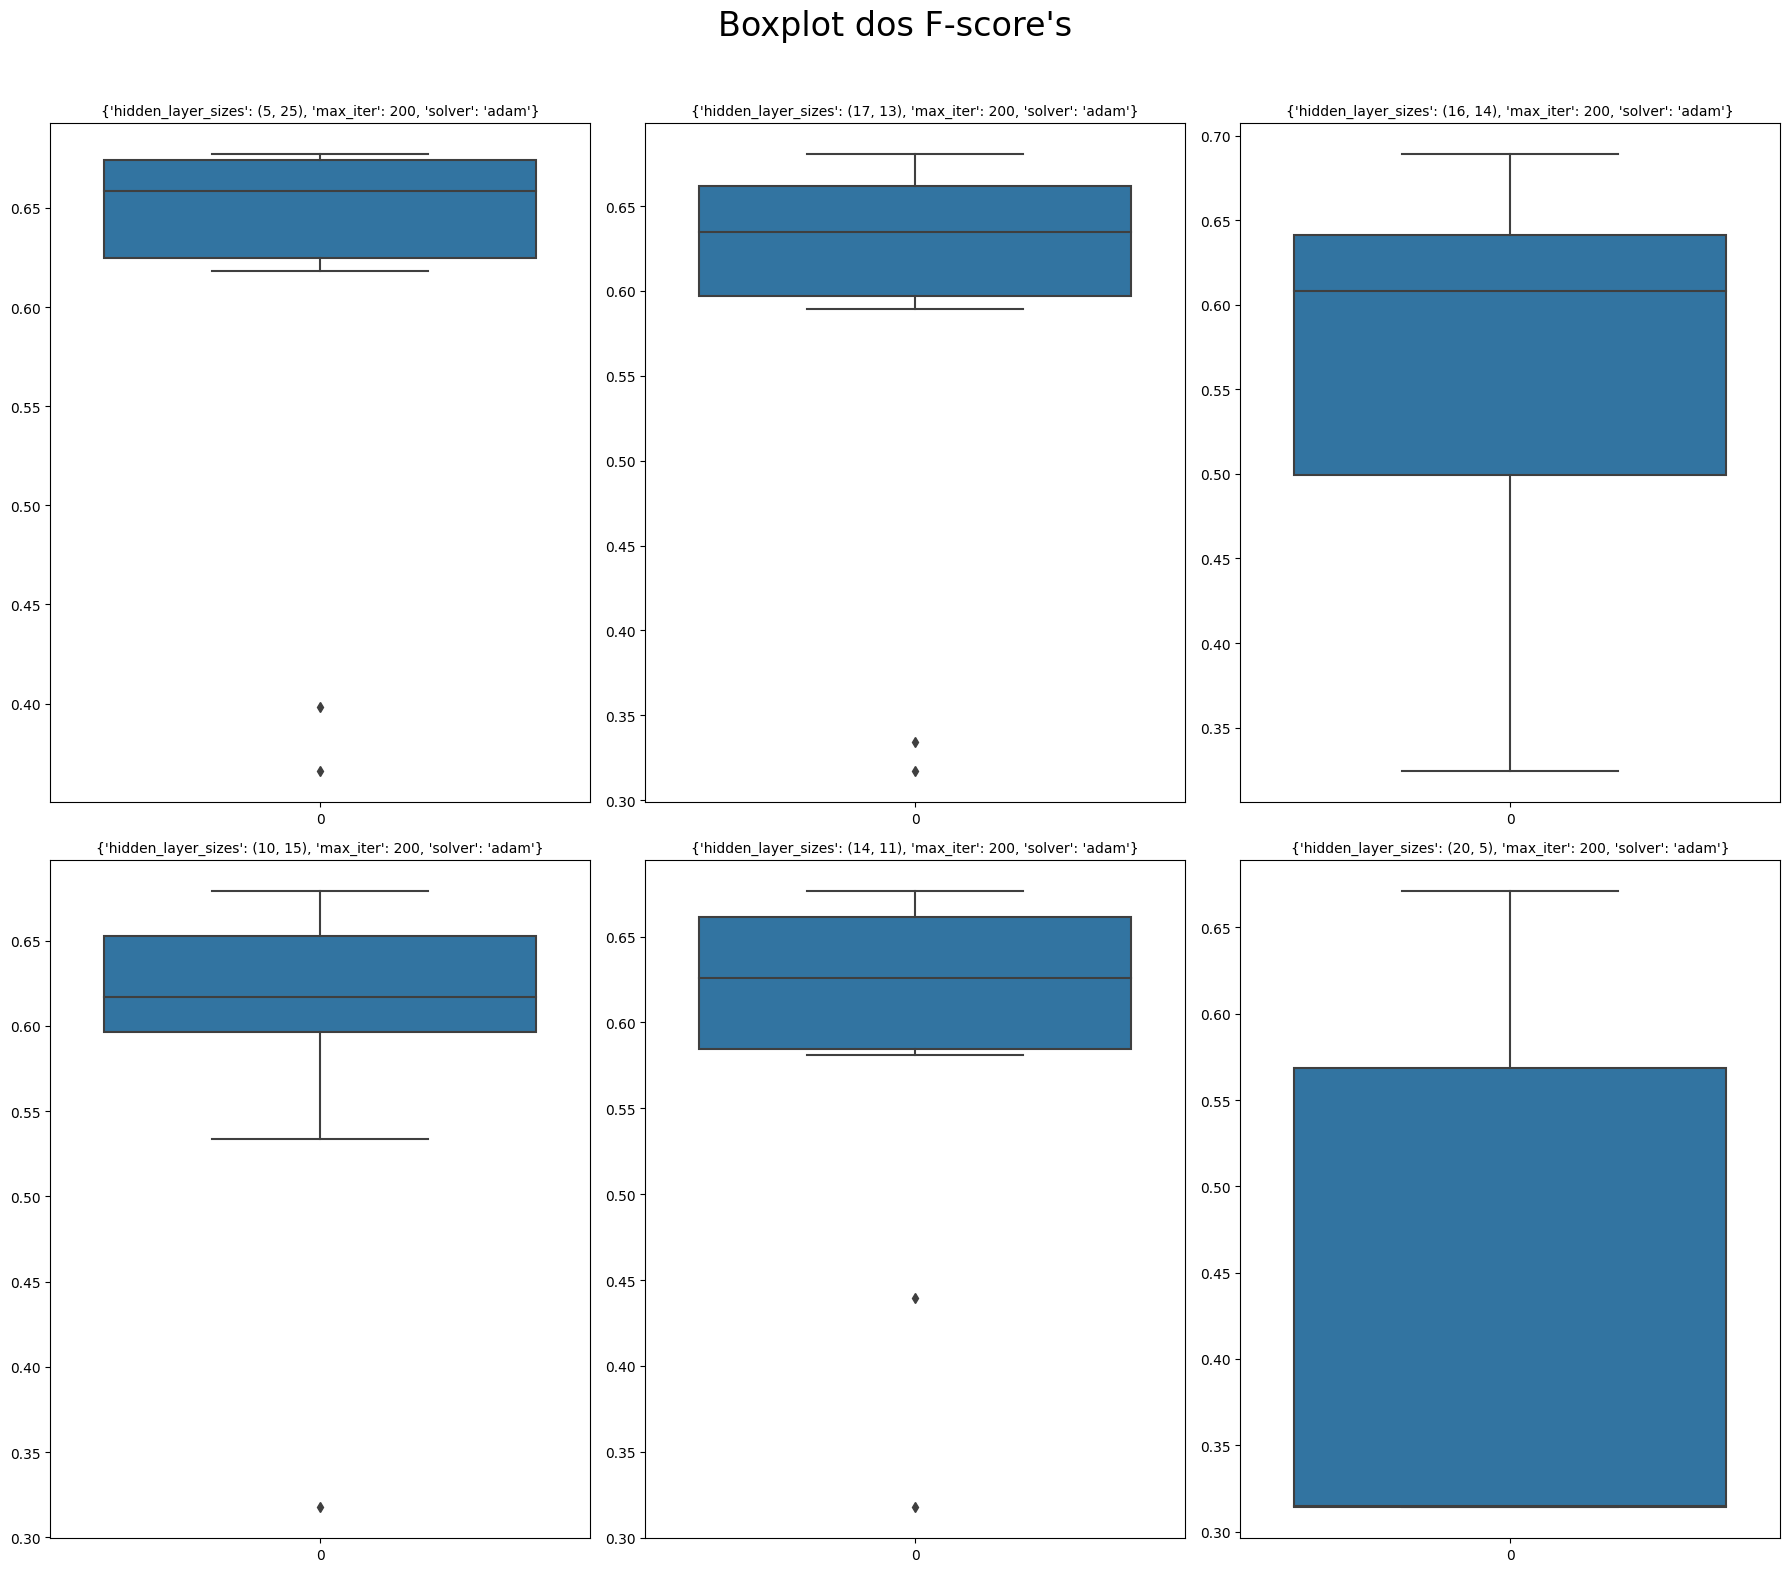

In [ ]:
plot_f_score(results_list)

## Considerações Parciais

**1. É possível identificar uma rede com desempenho superior às demais?**
A partir dos experimentos realizados e nas métricas obtidas com base nas previsões das redes treinadas, percebemos que apesar das várias arquiteturas propostas e técnicas diferentes para treinar as redes, os resultados não foram significativamente melhores. Em geral, a melhor das redes com arquitetura escolhida de forma aleatória (dado o conjunto de parâmetros pré-estabelecidos) atingiu um resultado melhor (0,71 de acurácia) em comparação a melhor rede das redes treinadas com a estratégia de Pirâmide Geométrica (com 0,70 de acurácia).

**2. Qual estratégia mostrou-se mais producente para a obtenção de boas arquiteturas (Estratégia Própria ou Pirâmide Geométrica)? Por quê?**
Como explicado anteriormente, a rede que obteve a melhor acurácia e melhor pontuação F1 foi a rede com arquitetura de escolha própria (com estratégia de seleção aleatória). Comparando também as duas outras redes do mesmo conjunto, percebemos que elas obtiveram bons resultados em comparação as redes com a estratégia da Pirâmide Geométrica.
A partir disso, observando os parâmetros utilizados percebemos que a primeira estratégia utilizou combinações com quantidades de neurônios superiores aos valores estimados pela estratégia da Pirâmide Geométrica fato este que possivelmente contribuiu para a melhor generalização da rede.

**3. Considerar os atributos categóricos trouxe melhorias? Justifique.**
Em geral não. Com base nos resultados alcançados dos experimentos, a utilização de atributos categóricos no treinamento não contribuiu de maneira significativa para a rede acertar mais exemplos. Isso pode ter ocorrido devido ao método "One-Hot-Encoding" utilizado para transformar estas variáveis em categóricas,  pois esta técnica pode aumentar significativamente a dimensionalidade dos dados, causando problemas de espaçamento (muitos zeros), o que pode ocasionar um desempenho ruim em alguns algoritmos.

**4. Um número maior de épocas trouxe melhorias?**
Em geral sim. As redes com melhores resultados precisaram, pelo menos, da quantidade de épocas intermediária dada no conjunto de parâmetros.

**5. Qual a maior dificuldade de resolução do problema proposto perante as RNAs?**
Além das limitações e falta de otimizações de hardware da biblioteca scikit-learn (para utilização de GPU), um dos maiores desafios no treinamento de redes neurais está em descobrir as melhores combinações de parâmetros para o problema levando em consideração a flutuação estocástica e o tamanho do problema.